In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.target[:5]#encoded of 3 names

array([0, 0, 0, 0, 0])

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
x=df.drop(['target'],axis='columns')
y=df.target

In [46]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy',n_estimators=40)


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
model.fit(x_train,y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [52]:
model.score(x_test,y_test)

0.9666666666666667

In [53]:
model.predict(x_test)

array([0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 2, 2])

In [56]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cn=confusion_matrix(y_test,y_pred)
cn

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  8]])

<Axes: >

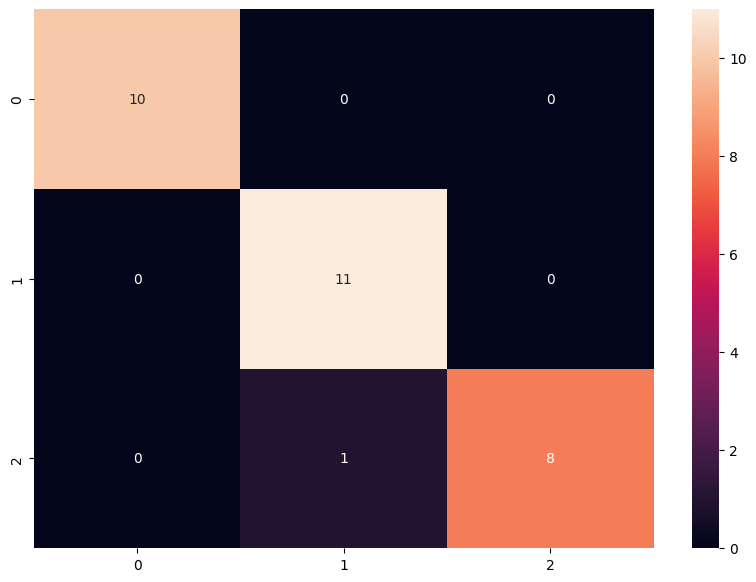

In [58]:
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True)
